# DAP Project - Modeling & Predicting of Churning Customers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('BankChurners.csv')
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

## Wrangling Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Data type của dữ liệu tương đối chuẩn, object thì đều là category, cẩn chỉnh 1 chút giữa float và int

In [4]:
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [5]:
df.describe(include=['object'], exclude=['int64', 'float64'])


Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

- Để cleaning data 1 cách hiệu quả nhất thì phải có cái nhìn tổng quan về data qua việc visualize cơ bản phân phối bộ dữ liệu.
- Trong quá trình xử lý toàn bộ project dưới đây, nhiều bước bắt buộc phải được thực hiện song song chứ khó có thể chia ra từng step 1 cách riêng rẽ và đơn giản như trong lý thuyết

In [6]:
# Drop cột này vì eda cũng không có tác dụng
df.drop('CLIENTNUM', axis=1, inplace=True)

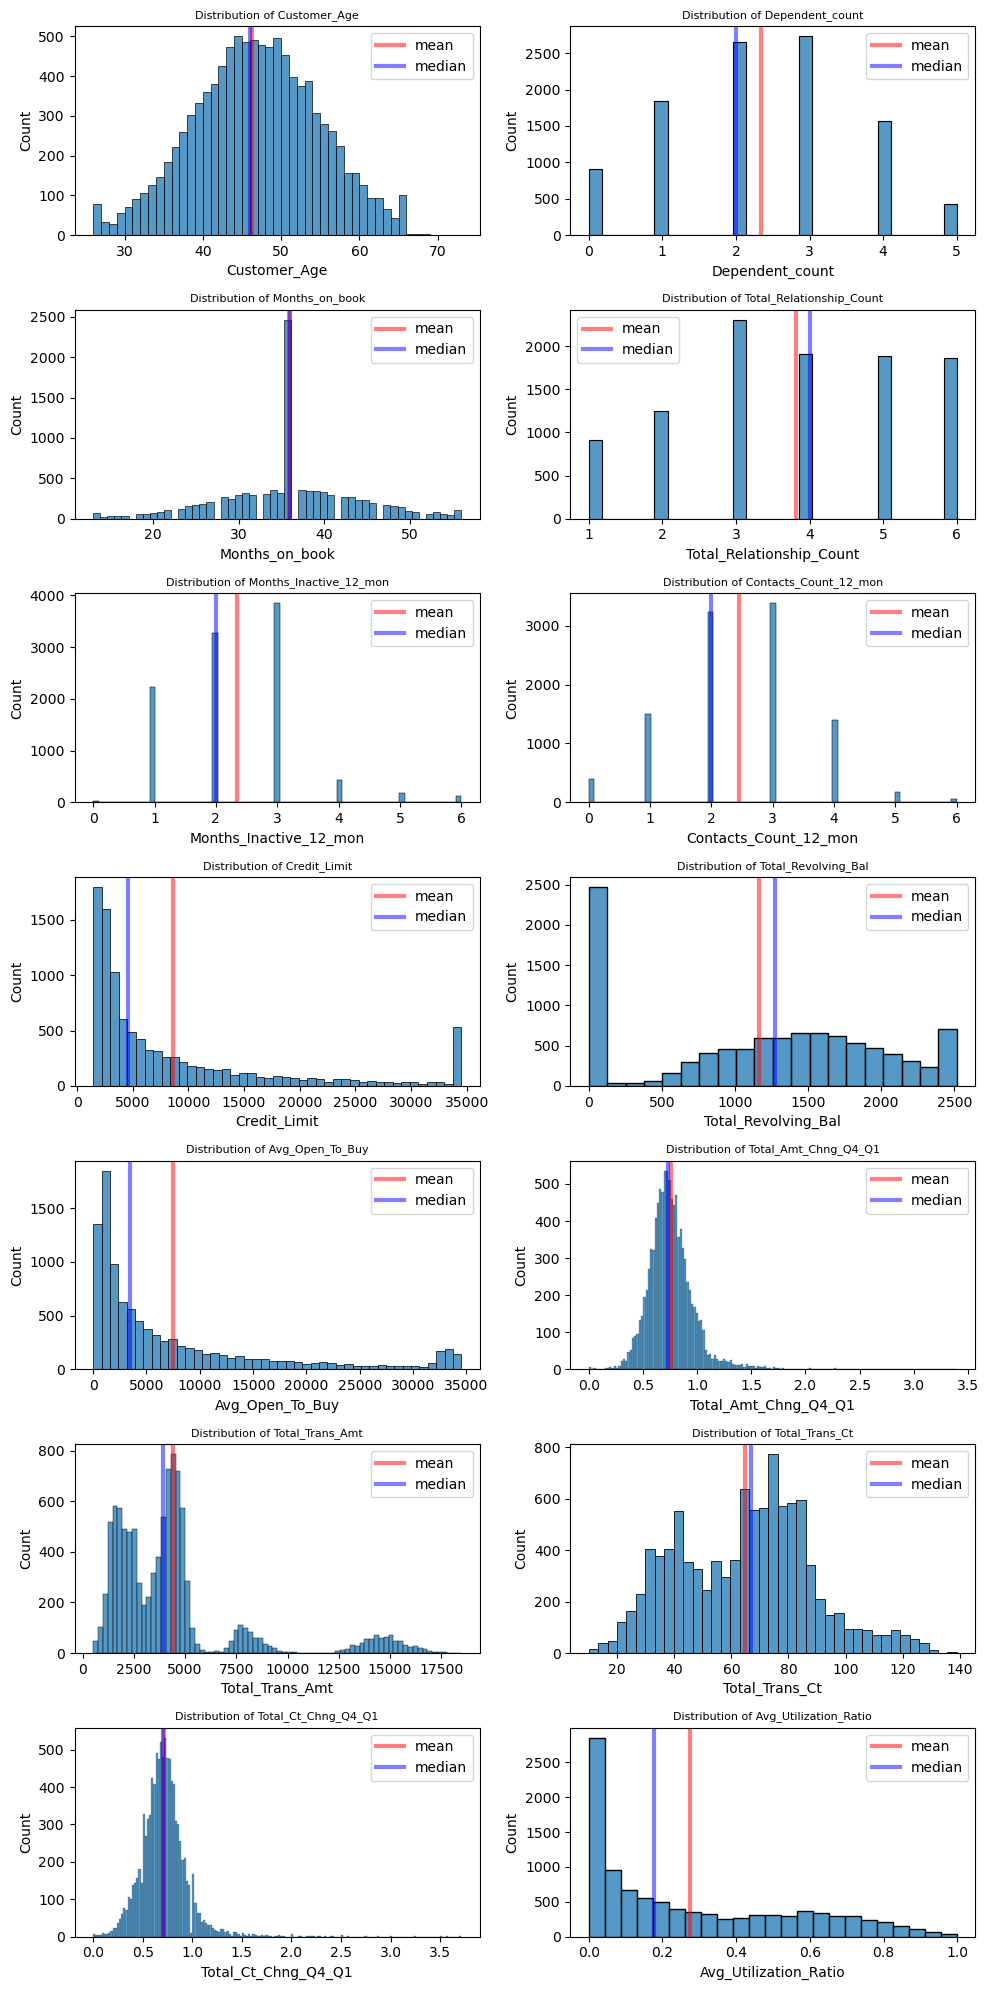

In [7]:
fig, axes = plt.subplots(7, 2, figsize=(10, 20))
numeric_columns = df.select_dtypes(exclude=['object']).columns

k = 0
for i in range(7):
    for j in range(2):
        sns.histplot(x= numeric_columns[k], data=df, ax=axes[i, j])

        axes[i, j].axvline(x=df[numeric_columns[k]].mean(), linewidth=3, color='r', label="mean", alpha=0.5)
        axes[i, j].axvline(x=df[numeric_columns[k]].median(), linewidth=3, color='b', label="median", alpha=0.5)

        axes[i, j].set_xlabel(numeric_columns[k])
        axes[i, j].set_ylabel("Count")
        axes[i, j].set_title(f"Distribution of {numeric_columns[k]}", size=8)
        axes[i, j].legend(["mean", "median"])
        k += 1
            
plt.tight_layout()
plt.show()


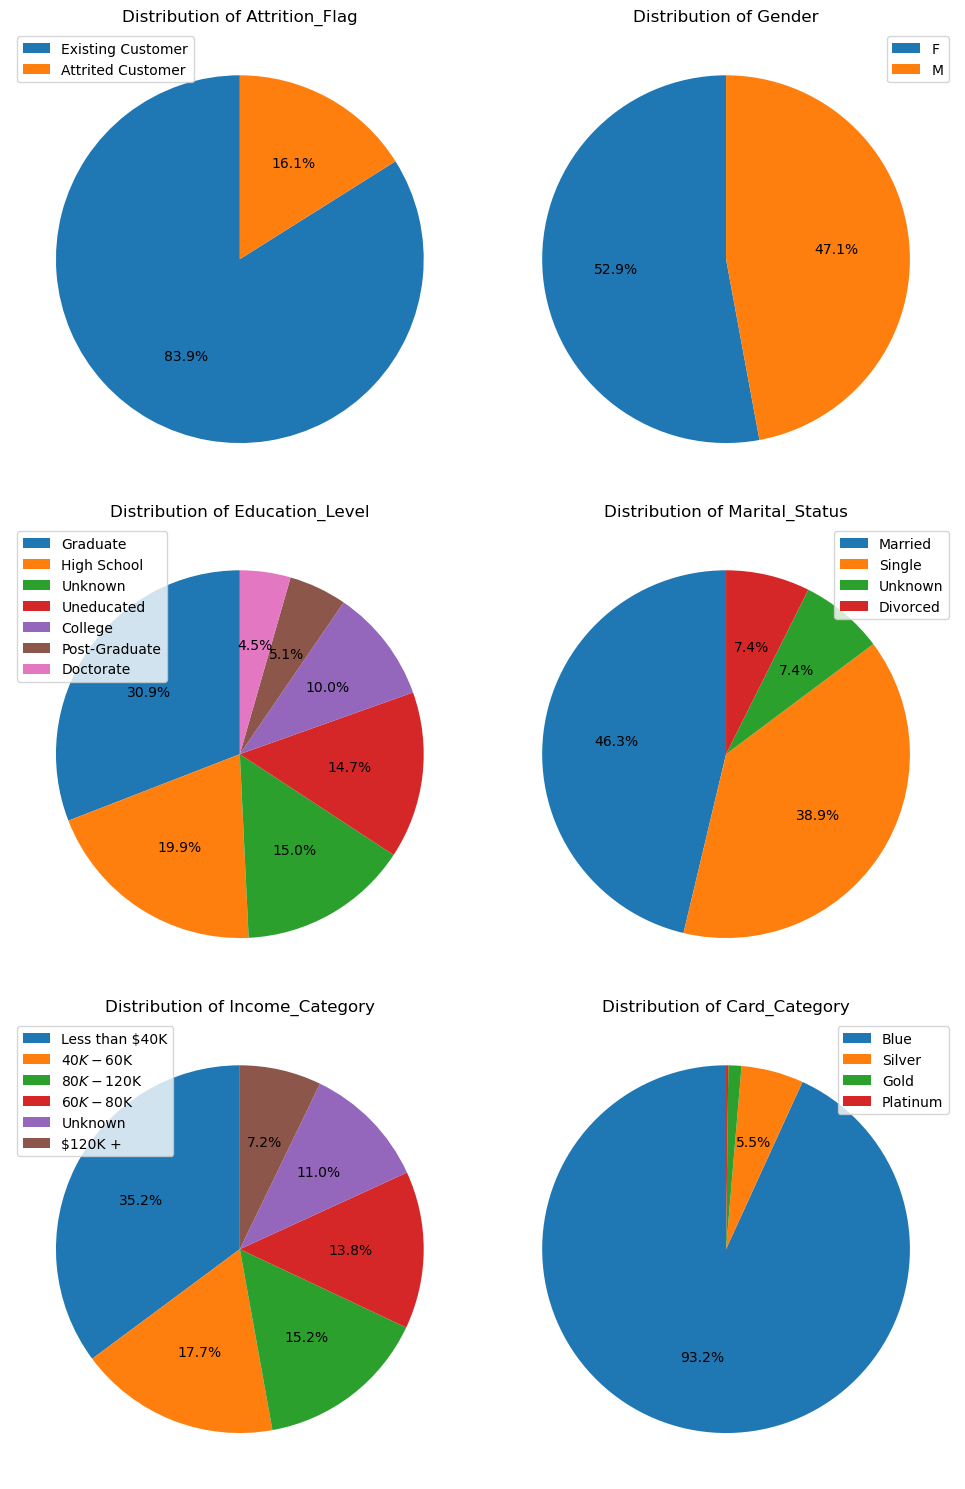

In [8]:
object_columns = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(3, 2, figsize=(10, 15))

k = 0
for i in range(3):
    for j in range(2):
        values = df[object_columns[k]].value_counts().values
        labels = df[object_columns[k]].value_counts().index

        # Tạo Pie Chart
        def my_autopct(pct):
            return f'{pct:.1f}%' if pct >= 3 else ''

        axes[i, j].pie(values, autopct=my_autopct, startangle=90)
        axes[i, j].set_title(f"Distribution of {object_columns[k]}", size=12)
        axes[i, j].legend(labels)
        k += 1

plt.tight_layout()
plt.show()

### Data Formatting

Không cần phải format data vì data được lấy từ 1 nguồn duy nhất.

### Handling missing values

In [9]:
unknown_counts = df.apply(lambda x: x.eq('Unknown').sum())
unknown_counts

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

Vì là dữ liệu dạng category nên cách đơn giản nhất là thay thế missing value bằng mode, nhưng như thế sẽ làm mất đi tính logic của dữ liệu.
Ví dụ xét về income category thì Less than 40K là nhiều nhất, nếu lập tức thay giá trị bằng Less than $40K mà không quan tâm đến các yếu tố như hạn mức tín dụng, thì sẽ xảy ra tình trạng 1 thằng nghèo nhưng lại có hạn mức tín dụng siêu cao, hay outlier.
Cái t2 vì lượng missing value tương đối nhiều nên yêu cầu phải có 1 cách xử lý khác hiệu quả hơn

=> Dự đoán missing value dựa vào các feature còn lại -- sử dụng KNN để giữ tính đơn giản mà độ hiệu quả vẫn tương đối cao
+ Nếu sd cách thông thường phải encoding, normalization mới điền được missing value, rồi encoding, normalization lần nữa

+ Nếu sd KNNImpute của sklearn.impute thì nó vẫn cần encoding và normalization trước. Sau đó tiến hành impute rồi encoding lại.

Giờ chỉ còn cách encoding và normalization nhưng chừa ra 3 cột có NaN, rồi sử dụng KNNimpute xong mới encoding 3 cột đó



Chuyển hết giá trị 'Unknown' về NaN cho dễ xử lý bằng thư viện

In [10]:
df.replace("Unknown", np.nan, inplace=True)

In [11]:
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

### Encoding những features không chứa NaN

In [12]:
object_columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

Attrition Flag, Gender thì binary encoding vì chỉ có 2 giá trị

Attrition Flag:
+ Existing Customer = 1
+ Attrited Customer = 0

Gender:
+ Male = 1
+ Female = 0

In [13]:
import category_encoders as ce

binary_encoder = ce.BinaryEncoder(cols=['Attrition_Flag'])
df = binary_encoder.fit_transform(df)
df.drop('Attrition_Flag_0', axis=1, inplace= True)
df.rename(columns={'Attrition_Flag_1': 'Attrition_Flag'}, inplace= True)

df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0               1            45      M                3     High School   
1               1            49      F                5        Graduate   
2               1            51      M                3        Graduate   
3               1            40      F                4     High School   
4               1            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3            NaN  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [14]:
binary_encoder = ce.BinaryEncoder(cols=['Gender'])
df = binary_encoder.fit_transform(df)
df.drop('Gender_0', axis=1, inplace= True)
df.rename(columns={'Gender_1': 'Gender'}, inplace= True)

df.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
0               1            45       1                3     High School   
1               1            49       0                5        Graduate   
2               1            51       1                3        Graduate   
3               1            40       0                4     High School   
4               1            40       1                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3            NaN  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [15]:
df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

Card_Category theo order Blue < Silver < Gold < Platinum

In [16]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['Blue', 'Silver', 'Gold', 'Platinum']])
df['Card_Category'] = ordinal_encoder.fit_transform(df[['Card_Category']])

df.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
0               1            45       1                3     High School   
1               1            49       0                5        Graduate   
2               1            51       1                3        Graduate   
3               1            40       0                4     High School   
4               1            40       1                3      Uneducated   

  Marital_Status Income_Category  Card_Category  Months_on_book  \
0        Married     $60K - $80K            0.0              39   
1         Single  Less than $40K            0.0              44   
2        Married    $80K - $120K            0.0              36   
3            NaN  Less than $40K            0.0              34   
4        Married     $60K - $80K            0.0              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

### Data Normalization

Data Normalization vể tổng quát sẽ có lợi cho visualization và modeling, bước này tương đối quan trọng
+ Normalize data trước khi sd KNN impute

In [17]:
df

Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
0                   1            45       1                3     High School   
1                   1            49       0                5        Graduate   
2                   1            51       1                3        Graduate   
3                   1            40       0                4     High School   
4                   1            40       1                3      Uneducated   
...               ...           ...     ...              ...             ...   
10122               1            50       1                2        Graduate   
10123               0            41       1                2             NaN   
10124               0            44       0                1     High School   
10125               0            30       1                2        Graduate   
10126               0            43       0                2        Graduate   

      Marital_Status Income_Category  Card_Category  Months_on_book  \
0            Married     $60K - $80K            0.0              39   
1             Single  Less than $40K            0.0              44   
2            Married    $80K - $120K            0.0              36   
3                NaN  Less than $40K            0.0              34   
4            Married     $60K - $80K            0.0              21   
...              ...             ...            ...             ...   
10122         Single     $40K - $60K            0.0              40   
10123       Divorced     $40K - $60K            0.0              25   
10124        Married  Less than $40K            0.0              36   
10125            NaN     $40K - $60K            0.0              36   
10126        Married  Less than $40K            1.0              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0         

Nhìn sơ qua, 8/14 quantitive features có phân phối chuẩn hoặc xấp xỉ phân phối chuẩn
=> Sử dụng StandardScaler thay vì RoburstScaler (cho dữ liệu không phân phối chuẩn) và Min-Max Scaler (nhạy cảm với nhiễu).

Hoặc sử dụng cả StandardScaler và RoburstScaler riêng cho từng nhóm.

Không cần normalized encoding category data.

In [18]:
numeric_columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

Ta sẽ tiến hành xét các skewed features, từ đó quyết định feature nào sử dụng roburstscaler


In [19]:
symmetric_feature = []
skewed_feature = []
for i in numeric_columns:
    if -0.5 < df['%s' % i].skew() < 0.5:
        print('%s: Approximately symmetric.'%i)
        symmetric_feature.append(i)
    elif df['%s' % i].skew() < - 0.5:
        print('%s: Negatively skewed.'%i)
        skewed_feature.append(i)
    else:
        print('%s: Positively skewed.'%i)
        skewed_feature.append(i)

print('\nNumber of skewed columns :', len(skewed_feature))

Customer_Age: Approximately symmetric.
Dependent_count: Approximately symmetric.
Months_on_book: Approximately symmetric.
Total_Relationship_Count: Approximately symmetric.
Months_Inactive_12_mon: Positively skewed.
Contacts_Count_12_mon: Approximately symmetric.
Credit_Limit: Positively skewed.
Total_Revolving_Bal: Approximately symmetric.
Avg_Open_To_Buy: Positively skewed.
Total_Amt_Chng_Q4_Q1: Positively skewed.
Total_Trans_Amt: Positively skewed.
Total_Trans_Ct: Approximately symmetric.
Total_Ct_Chng_Q4_Q1: Positively skewed.
Avg_Utilization_Ratio: Positively skewed.

Number of skewed columns : 7


In [20]:
skewed_feature

['Months_Inactive_12_mon',
 'Credit_Limit',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

7/14 là skewed feature thì sử dụng cả 2 sẽ hợp lý hơn

'Skewed data can have outliers or long tails that can significantly affect the mean and standard deviation, which are the parameters used by StandardScaler. StandardScaler assumes that the data follows a Gaussian distribution, so it scales the data based on these parameters. However, if the data is highly skewed or contains outliers, this assumption may not hold true, and StandardScaler may not be the best choice.'

'On the other hand, RobustScaler is more resistant to outliers and non-Gaussian distributions. It uses the median and interquartile range (IQR) to scale the data, making it a better option for datasets with skewed distributions or outliers. The median and IQR are more robust statistics that are less affected by extreme values compared to the mean and standard deviation.'

Về xử lý outliers thì RobustScaler vẫn mạnh hơn

In [21]:
from sklearn.preprocessing import StandardScaler, RobustScaler
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()


df[symmetric_feature] = standard_scaler.fit_transform(df[symmetric_feature])

df[skewed_feature] = robust_scaler.fit_transform(df[skewed_feature])

df.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
0               1     -0.165406       1         0.503368     High School   
1               1      0.333570       0         2.043199        Graduate   
2               1      0.583058       1         0.503368        Graduate   
3               1     -0.789126       0         1.273283     High School   
4               1     -0.789126       1         0.503368      Uneducated   

  Marital_Status Income_Category  Card_Category  Months_on_book  \
0        Married     $60K - $80K            0.0        0.384621   
1         Single  Less than $40K            0.0        1.010715   
2        Married    $80K - $120K            0.0        0.008965   
3            NaN  Less than $40K            0.0       -0.241473   
4        Married     $60K - $80K            0.0       -1.869317   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  0.763943                    -1.0               0.492404   
1                  1.407306                    -1.0              -0.411616   
2                  0.120579                    -1.0              -2.219655   
3                 -0.522785                     2.0              -1.315636   
4                  0.763943                    -1.0              -2.219655   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0      0.956476            -0.473422         0.988927              2.627193   
1      0.435477            -0.366667         0.459078              3.530702   
2     -0.132863            -1.426858        -0.006562              8.149123   
3     -0.145198             1.661686        -0.313785              2.934211   
4      0.019618            -1.426858         0.145527              6.311404   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0        -1.065558       -0.973895             3.911017              -0.239583  
1        -1.008702       -1.357340            12.762712              -0.147917  
2        -0.778186       -1.911206             6.911017              -0.366667  
3        -1.055115       -1.911206             6.911017               1.216667  
4        -1.192419       -1.570365             7.618644              -0.366667

Lúc đầu mình chỉ định sử dụng 1 trong 2, do sợ lệch range vì scaler khác nhau, nhưng khi sử dụng mỗi roburst scaler thì 1 số feature vẫn có range lớn hơn nên quay lại sd cả 2

Bản chất để lựa chọn scaler phải dựa vào bộ data, dùng sao cho hợp lý để vừa xử lý được outliers, capture được phân phối của feature, từ đó mất ít thông tin và tất nhiên quan trọng nhất là đưa về cùng range.

### Handling missing data using KNN impute + encoding

"In general, mode imputation is a simpler approach that can work well when missingness is unrelated to other variables and the most frequent category provides a reasonable estimate. On the other hand, KNN imputation can be beneficial when there are interactions and dependencies between variables, and you want to leverage the information from similar instances to make better estimates.

It's recommended to consider the characteristics of your data, the extent of missingness, the presence of relationships between variables, and the computational feasibility when choosing between mode imputation and KNN imputation for categorical variables. Additionally, it's advisable to evaluate the performance and assess the impact of imputation on downstream analysis to make an informed decision."

Mình sẽ tiến hành từ dữ liệu ít quan trọng -> dữ liệu quan trọng nhất

Vì KNN impute chỉ xử lý dữ liệu dạng số => tiến hành gán label

In [22]:
for i in range(len(df)):
    if df['Marital_Status'][i] == 'Single': df['Marital_Status'][i] = 0
    if df['Marital_Status'][i] == 'Married': df['Marital_Status'][i] = 1
    if df['Marital_Status'][i] == 'Divorced': df['Marital_Status'][i] = 2

# Cái này chỉ là label, không phải feature nên không cần quan tâm kiểu ordinal
 

C:\Users\ngocd\AppData\Local\Temp\ipykernel_10704\3392992885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if df['Marital_Status'][i] == 'Married': df['Marital_Status'][i] = 1
C:\Users\ngocd\AppData\Local\Temp\ipykernel_10704\3392992885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if df['Marital_Status'][i] == 'Single': df['Marital_Status'][i] = 0
C:\Users\ngocd\AppData\Local\Temp\ipykernel_10704\3392992885.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [23]:
import pandas as pd
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10) #lấy tạm k = 10

# Perform the imputation
imputed_df = pd.DataFrame(imputer.fit_transform(df.drop(['Education_Level', 'Income_Category'],axis=1)), 
                          columns=[x for x in df.columns if x not in ['Education_Level', 'Income_Category']])


In [24]:
#tại sao knn là bài toán classification lại trả về kq float? Tạm thời cứ làm tròn để lấy kq gần nhất
df['Marital_Status'] = imputed_df['Marital_Status'].round().astype('int')

df['Marital_Status']

0        1
1        0
2        1
3        1
4        1
        ..
10122    0
10123    2
10124    1
10125    0
10126    1
Name: Marital_Status, Length: 10127, dtype: int32

'Marital_Status' thì dùng one-hot encoding là phù hợp nhất do việc xác định thứ bậc cho Single Married Divorced thì tương đối bất hợp lý

In [25]:
one_hot_encoded = pd.get_dummies(df['Marital_Status'])
df = pd.concat([df, one_hot_encoded], axis=1)
df.drop('Marital_Status', axis=1, inplace= True)
df = df.rename(columns= {0: 'Single', 1:'Married', 2:'Divorced'})

df.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
0               1     -0.165406       1         0.503368     High School   
1               1      0.333570       0         2.043199        Graduate   
2               1      0.583058       1         0.503368        Graduate   
3               1     -0.789126       0         1.273283     High School   
4               1     -0.789126       1         0.503368      Uneducated   

  Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  \
0     $60K - $80K            0.0        0.384621                  0.763943   
1  Less than $40K            0.0        1.010715                  1.407306   
2    $80K - $120K            0.0        0.008965                  0.120579   
3  Less than $40K            0.0       -0.241473                 -0.522785   
4     $60K - $80K            0.0       -1.869317                  0.763943   

   Months_Inactive_12_mon  ...  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                    -1.0  ...            -0.473422         0.988927   
1                    -1.0  ...            -0.366667         0.459078   
2                    -1.0  ...            -1.426858        -0.006562   
3                     2.0  ...             1.661686        -0.313785   
4                    -1.0  ...            -1.426858         0.145527   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0              2.627193        -1.065558       -0.973895             3.911017   
1              3.530702        -1.008702       -1.357340            12.762712   
2              8.149123        -0.778186       -1.911206             6.911017   
3              2.934211        -1.055115       -1.911206             6.911017   
4              6.311404        -1.192419       -1.570365             7.618644   

   Avg_Utilization_Ratio  Single  Married  Divorced  
0              -0.239583       0        1         0  
1              -0.147917       1        0         0  
2              -0.366667       0        1         0  
3               1.216667       0        1         0  
4              -0.366667       0        1         0  

[5 rows x 22 columns]

Như mình KNNimpute trong thư viện sklearn chỉ sd dữ liệu dạng số, nên thay vì gán lại toàn bộ label như trên, ta có thể tận dụng luôn việc encoding đang triển khai để label dữ liệu.
(Do Marial_Status là encode kiểu one-hot nên phải label bằng tay)

'Education_Level', 'Income_Category', 'Card_Category' là dữ liệu dạng ordinal (theo thứ bậc) => Sử dụng ordinal ecoding

In [26]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', nan, 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

Ta sẽ xét theo order 'Uneducated' < 'High School' < 'College' < 'Graduate' < 'Post-Graduate' < 'Doctorate'

'In terms of progression, one typically completes college (undergraduate education) before considering post-graduate education. However, it's not accurate to rank them in a strict ordinal manner as they serve different purposes and cater to different educational needs.'

'In summary, the ordinal order would be: College (undergraduate) -> Graduate (master's or doctoral) -> Postgraduate (advanced studies beyond graduate level).'

In [27]:
# Biến NaN thành Unknown để khai thác các encoding libary sau (encoding không xử lý được dữ liệu dạng NaN)
df.fillna('Unknown', inplace=True)

In [28]:
ordinal_encoder = OrdinalEncoder(categories=[['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown']])
df['Education_Level'] = ordinal_encoder.fit_transform(df[['Education_Level']])

#Chuyển lại thành NaN để tiến hành impute
df['Education_Level'] = df['Education_Level'].replace(6, np.NaN)

df.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0               1     -0.165406       1         0.503368              1.0   
1               1      0.333570       0         2.043199              3.0   
2               1      0.583058       1         0.503368              3.0   
3               1     -0.789126       0         1.273283              1.0   
4               1     -0.789126       1         0.503368              0.0   

  Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  \
0     $60K - $80K            0.0        0.384621                  0.763943   
1  Less than $40K            0.0        1.010715                  1.407306   
2    $80K - $120K            0.0        0.008965                  0.120579   
3  Less than $40K            0.0       -0.241473                 -0.522785   
4     $60K - $80K            0.0       -1.869317                  0.763943   

   Months_Inactive_12_mon  ...  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                    -1.0  ...            -0.473422         0.988927   
1                    -1.0  ...            -0.366667         0.459078   
2                    -1.0  ...            -1.426858        -0.006562   
3                     2.0  ...             1.661686        -0.313785   
4                    -1.0  ...            -1.426858         0.145527   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0              2.627193        -1.065558       -0.973895             3.911017   
1              3.530702        -1.008702       -1.357340            12.762712   
2              8.149123        -0.778186       -1.911206             6.911017   
3              2.934211        -1.055115       -1.911206             6.911017   
4              6.311404        -1.192419       -1.570365             7.618644   

   Avg_Utilization_Ratio  Single  Married  Divorced  
0              -0.239583       0        1         0  
1              -0.147917       1        0         0  
2              -0.366667       0        1         0  
3               1.216667       0        1         0  
4              -0.366667       0        1         0  

[5 rows x 22 columns]

In [29]:
imputer = KNNImputer(n_neighbors=10)

# Perform the imputation
imputed_df = pd.DataFrame(imputer.fit_transform(df.drop(['Income_Category'],axis=1)), 
                          columns=[x for x in df.columns if x not in ['Income_Category']])


In [30]:
df['Education_Level'] = imputed_df['Education_Level'].round().astype('int')

df['Education_Level']

0        1
1        3
2        3
3        1
4        0
        ..
10122    3
10123    3
10124    1
10125    3
10126    3
Name: Education_Level, Length: 10127, dtype: int32

In [31]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

Income_Category sẽ xét theo order 'Less than $40K' < '$40K - $60K' < '$60K - $80K' < '$80K - $120K' < '$120K +'

In [32]:
ordinal_encoder = OrdinalEncoder(categories=[['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']])
df['Income_Category'] = ordinal_encoder.fit_transform(df[['Income_Category']])

#Chuyển lại thành NaN để tiến hành impute
df['Income_Category'] = df['Income_Category'].replace(5, np.NaN)

df.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0               1     -0.165406       1         0.503368                1   
1               1      0.333570       0         2.043199                3   
2               1      0.583058       1         0.503368                3   
3               1     -0.789126       0         1.273283                1   
4               1     -0.789126       1         0.503368                0   

   Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  \
0              2.0            0.0        0.384621                  0.763943   
1              0.0            0.0        1.010715                  1.407306   
2              3.0            0.0        0.008965                  0.120579   
3              0.0            0.0       -0.241473                 -0.522785   
4              2.0            0.0       -1.869317                  0.763943   

   Months_Inactive_12_mon  ...  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                    -1.0  ...            -0.473422         0.988927   
1                    -1.0  ...            -0.366667         0.459078   
2                    -1.0  ...            -1.426858        -0.006562   
3                     2.0  ...             1.661686        -0.313785   
4                    -1.0  ...            -1.426858         0.145527   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0              2.627193        -1.065558       -0.973895             3.911017   
1              3.530702        -1.008702       -1.357340            12.762712   
2              8.149123        -0.778186       -1.911206             6.911017   
3              2.934211        -1.055115       -1.911206             6.911017   
4              6.311404        -1.192419       -1.570365             7.618644   

   Avg_Utilization_Ratio  Single  Married  Divorced  
0              -0.239583       0        1         0  
1              -0.147917       1        0         0  
2              -0.366667       0        1         0  
3               1.216667       0        1         0  
4              -0.366667       0        1         0  

[5 rows x 22 columns]

In [33]:
#Khi impute Income_Category ta đã có thể sd tất cả các feature
imputer = KNNImputer(n_neighbors=10)

# Perform the imputation
imputed_df = pd.DataFrame(imputer.fit_transform(df), 
                          columns=df.columns)

In [34]:
df['Income_Category'] = imputed_df['Income_Category'].round().astype('int')

df['Income_Category']

0        2
1        0
2        3
3        0
4        2
        ..
10122    1
10123    1
10124    0
10125    1
10126    0
Name: Income_Category, Length: 10127, dtype: int32

### Data dtypes modify

Ta tiến hành chỉnh sửa dtype lần cuối, bước này nên là bước cuối vì sau 1 đống method bên trên thì dtypes tương đối lộn xộn

In [35]:
df.dtypes

Attrition_Flag                int64
Customer_Age                float64
Gender                        int64
Dependent_count             float64
Education_Level               int32
Income_Category               int32
Card_Category               float64
Months_on_book              float64
Total_Relationship_Count    float64
Months_Inactive_12_mon      float64
Contacts_Count_12_mon       float64
Credit_Limit                float64
Total_Revolving_Bal         float64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt             float64
Total_Trans_Ct              float64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Single                        uint8
Married                       uint8
Divorced                      uint8
dtype: object

In [36]:
df

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0                   1     -0.165406       1         0.503368                1   
1                   1      0.333570       0         2.043199                3   
2                   1      0.583058       1         0.503368                3   
3                   1     -0.789126       0         1.273283                1   
4                   1     -0.789126       1         0.503368                0   
...               ...           ...     ...              ...              ...   
10122               1      0.458314       1        -0.266547                3   
10123               0     -0.664382       1        -0.266547                3   
10124               0     -0.290150       0        -1.036462                1   
10125               0     -2.036565       1        -0.266547                3   
10126               0     -0.414894       0        -0.266547                3   

       Income_Category  Card_Category  Months_on_book  \
0                    2            0.0        0.384621   
1                    0            0.0        1.010715   
2                    3            0.0        0.008965   
3                    0            0.0       -0.241473   
4                    2            0.0       -1.869317   
...                ...            ...             ...   
10122                1            0.0        0.509840   
10123                1            0.0       -1.368442   
10124                0            0.0        0.008965   
10125                1            0.0        0.008965   
10126                0            1.0       -1.368442   

       Total_Relationship_Count  Months_Inactive_12_mon  ...  \
0                      0.763943                    -1.0  ...   
1                      1.407306                    -1.0  ...   
2                      0.120579                    -1.0  ...   
3                     -0.522785                     2.0  ...   
4                      0.763943                    -1.0  ...   
...                         ...                     ...  ...   
10122                 -0.522785                     0.0  ...   
10123                  0.120579                     0.0  ...   
10124                  0.763943                     1.0  ...   
10125                  0.120579                     1.0  ...   
10126                  1.407306                     0.0  ...   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                -0.473422         0.988927              2.627193   
1                -0.366667         0.459078              3.530702   
2                -1.426858        -0.006562              8.149123   
3                 1.661686        -0.313785              2.934211   
4                -1.426858         0.145527              6.311404   
...                    ...              ...                   ...   
10122             0.844455        -0.154901             -0.144737   
10123             1.255524        -0.162048              0.298246   
10124            -1.426858         0.226727              0.364035   
10125            -1.426858         0.211729             -0.881579   
10126             0.979433         0.580350             -0.144737   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0            -1.065558       -0.973895             3.911017   
1            -1.008702       -1.357340            12.762712   
2            -0.778186       -1.911206             6.911017   
3            -1.055115       -1.911206             6.911017   
4            -1.192419       -1.570365             7.618644   
...                ...             ...                  ...   
10122         4.477664        2.221481             0.656780   
10123         1.881648        0.176440            -0.080508   
10124         2.472249       -0.207005             0.491525   
10125         1.738929       -0.121795             0.084746   
10126         2.473409       -0.164400            -0.22457

In [37]:
df['Card_Category'] = df['Card_Category'].astype('int')
df['Single'] = df['Single'].astype('int')
df['Married'] = df['Married'].astype('int')
df['Divorced'] = df['Divorced'].astype('int')

In [38]:
df

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0                   1     -0.165406       1         0.503368                1   
1                   1      0.333570       0         2.043199                3   
2                   1      0.583058       1         0.503368                3   
3                   1     -0.789126       0         1.273283                1   
4                   1     -0.789126       1         0.503368                0   
...               ...           ...     ...              ...              ...   
10122               1      0.458314       1        -0.266547                3   
10123               0     -0.664382       1        -0.266547                3   
10124               0     -0.290150       0        -1.036462                1   
10125               0     -2.036565       1        -0.266547                3   
10126               0     -0.414894       0        -0.266547                3   

       Income_Category  Card_Category  Months_on_book  \
0                    2              0        0.384621   
1                    0              0        1.010715   
2                    3              0        0.008965   
3                    0              0       -0.241473   
4                    2              0       -1.869317   
...                ...            ...             ...   
10122                1              0        0.509840   
10123                1              0       -1.368442   
10124                0              0        0.008965   
10125                1              0        0.008965   
10126                0              1       -1.368442   

       Total_Relationship_Count  Months_Inactive_12_mon  ...  \
0                      0.763943                    -1.0  ...   
1                      1.407306                    -1.0  ...   
2                      0.120579                    -1.0  ...   
3                     -0.522785                     2.0  ...   
4                      0.763943                    -1.0  ...   
...                         ...                     ...  ...   
10122                 -0.522785                     0.0  ...   
10123                  0.120579                     0.0  ...   
10124                  0.763943                     1.0  ...   
10125                  0.120579                     1.0  ...   
10126                  1.407306                     0.0  ...   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                -0.473422         0.988927              2.627193   
1                -0.366667         0.459078              3.530702   
2                -1.426858        -0.006562              8.149123   
3                 1.661686        -0.313785              2.934211   
4                -1.426858         0.145527              6.311404   
...                    ...              ...                   ...   
10122             0.844455        -0.154901             -0.144737   
10123             1.255524        -0.162048              0.298246   
10124            -1.426858         0.226727              0.364035   
10125            -1.426858         0.211729             -0.881579   
10126             0.979433         0.580350             -0.144737   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0            -1.065558       -0.973895             3.911017   
1            -1.008702       -1.357340            12.762712   
2            -0.778186       -1.911206             6.911017   
3            -1.055115       -1.911206             6.911017   
4            -1.192419       -1.570365             7.618644   
...                ...             ...                  ...   
10122         4.477664        2.221481             0.656780   
10123         1.881648        0.176440            -0.080508   
10124         2.472249       -0.207005             0.491525   
10125         1.738929       -0.121795             0.084746   
10126         2.473409       -0.164400            -0.22457

## Exploratory Data Analysis

### giải thích các feature của dataframe

1. **Atrition_Flag** : Cho biết khách hàng đó có tiếp tục sử dụng dịch vụ không (1 là đã bỏ dịch vụ)
2. **Customer Age** : Tuổi của khác hàng
3. **Gender** : Giới tính
4. **Dependent_Count** : Số lượng người mà một cá nhân hoặc gia đình cần phải nuôi sống hoặc chăm sóc
5. **Education_Level**: Trình độ học vấn
6. **Income_Category**: Mức độ thu nhập
7. **Card_Category**: Loại thẻ
8. **Months_on_books**: Thời gian hoạt động với ngân hàng
9. **Total_Relationship_Count**: Số lượng dịch vụ mà khách hàng đang dùng
10. **Months_Inactive_12** : Thời gian khách hàng đã không hoạt dịch hay tương tác với ngân hàng
11. **No. of months inactive in the last 12 months**: Số lần mà khách hàng đã liên hệ với ngân hàng
12. **Credit_Limit**: Hạn mức tín dụng của khách hàng
13. **Avg_Open_To_Buy**: Số hạn mức tín dụng còn lại của khách hàng mỗi tháng (Trung bình 12 tháng)
14. **Total_Amt_Chng_Q4_Q1**: Tỷ lệ thay đổi giữa số tiền giao dịch trong quý 4 và quý 1
15. **Total_Trans_Amt**: Tổng số tiền khách hàng giao dịch trong 12 tháng
16. **Total_Trans_Ct**: Tổng số lần giao dịch của khách hàng trong 12 tháng
17. **Total_Ct_Chng_Q4_Q1**: Tỷ lệ thay đổi giữa số lần giao dịch trong quý 4 và quý 1
18. **Avg_Utilization_Ratio**:  Tỷ lệ sử dụng thẻ tín dụng trung bình của khách hàng
19. **Martial_Status**: Tình trạng hôn nhân

### Pairplot (Scatterplot)

Vì đây là bài toán classification, với target là category variable 0/1, đầu tiên ta sẽ vẽ pairplot (scatterplot) để xét sự phân phối của các feature dựa trên target.

=> Lấy được những insight về quan hệ giữa các feature với nhau và với target.

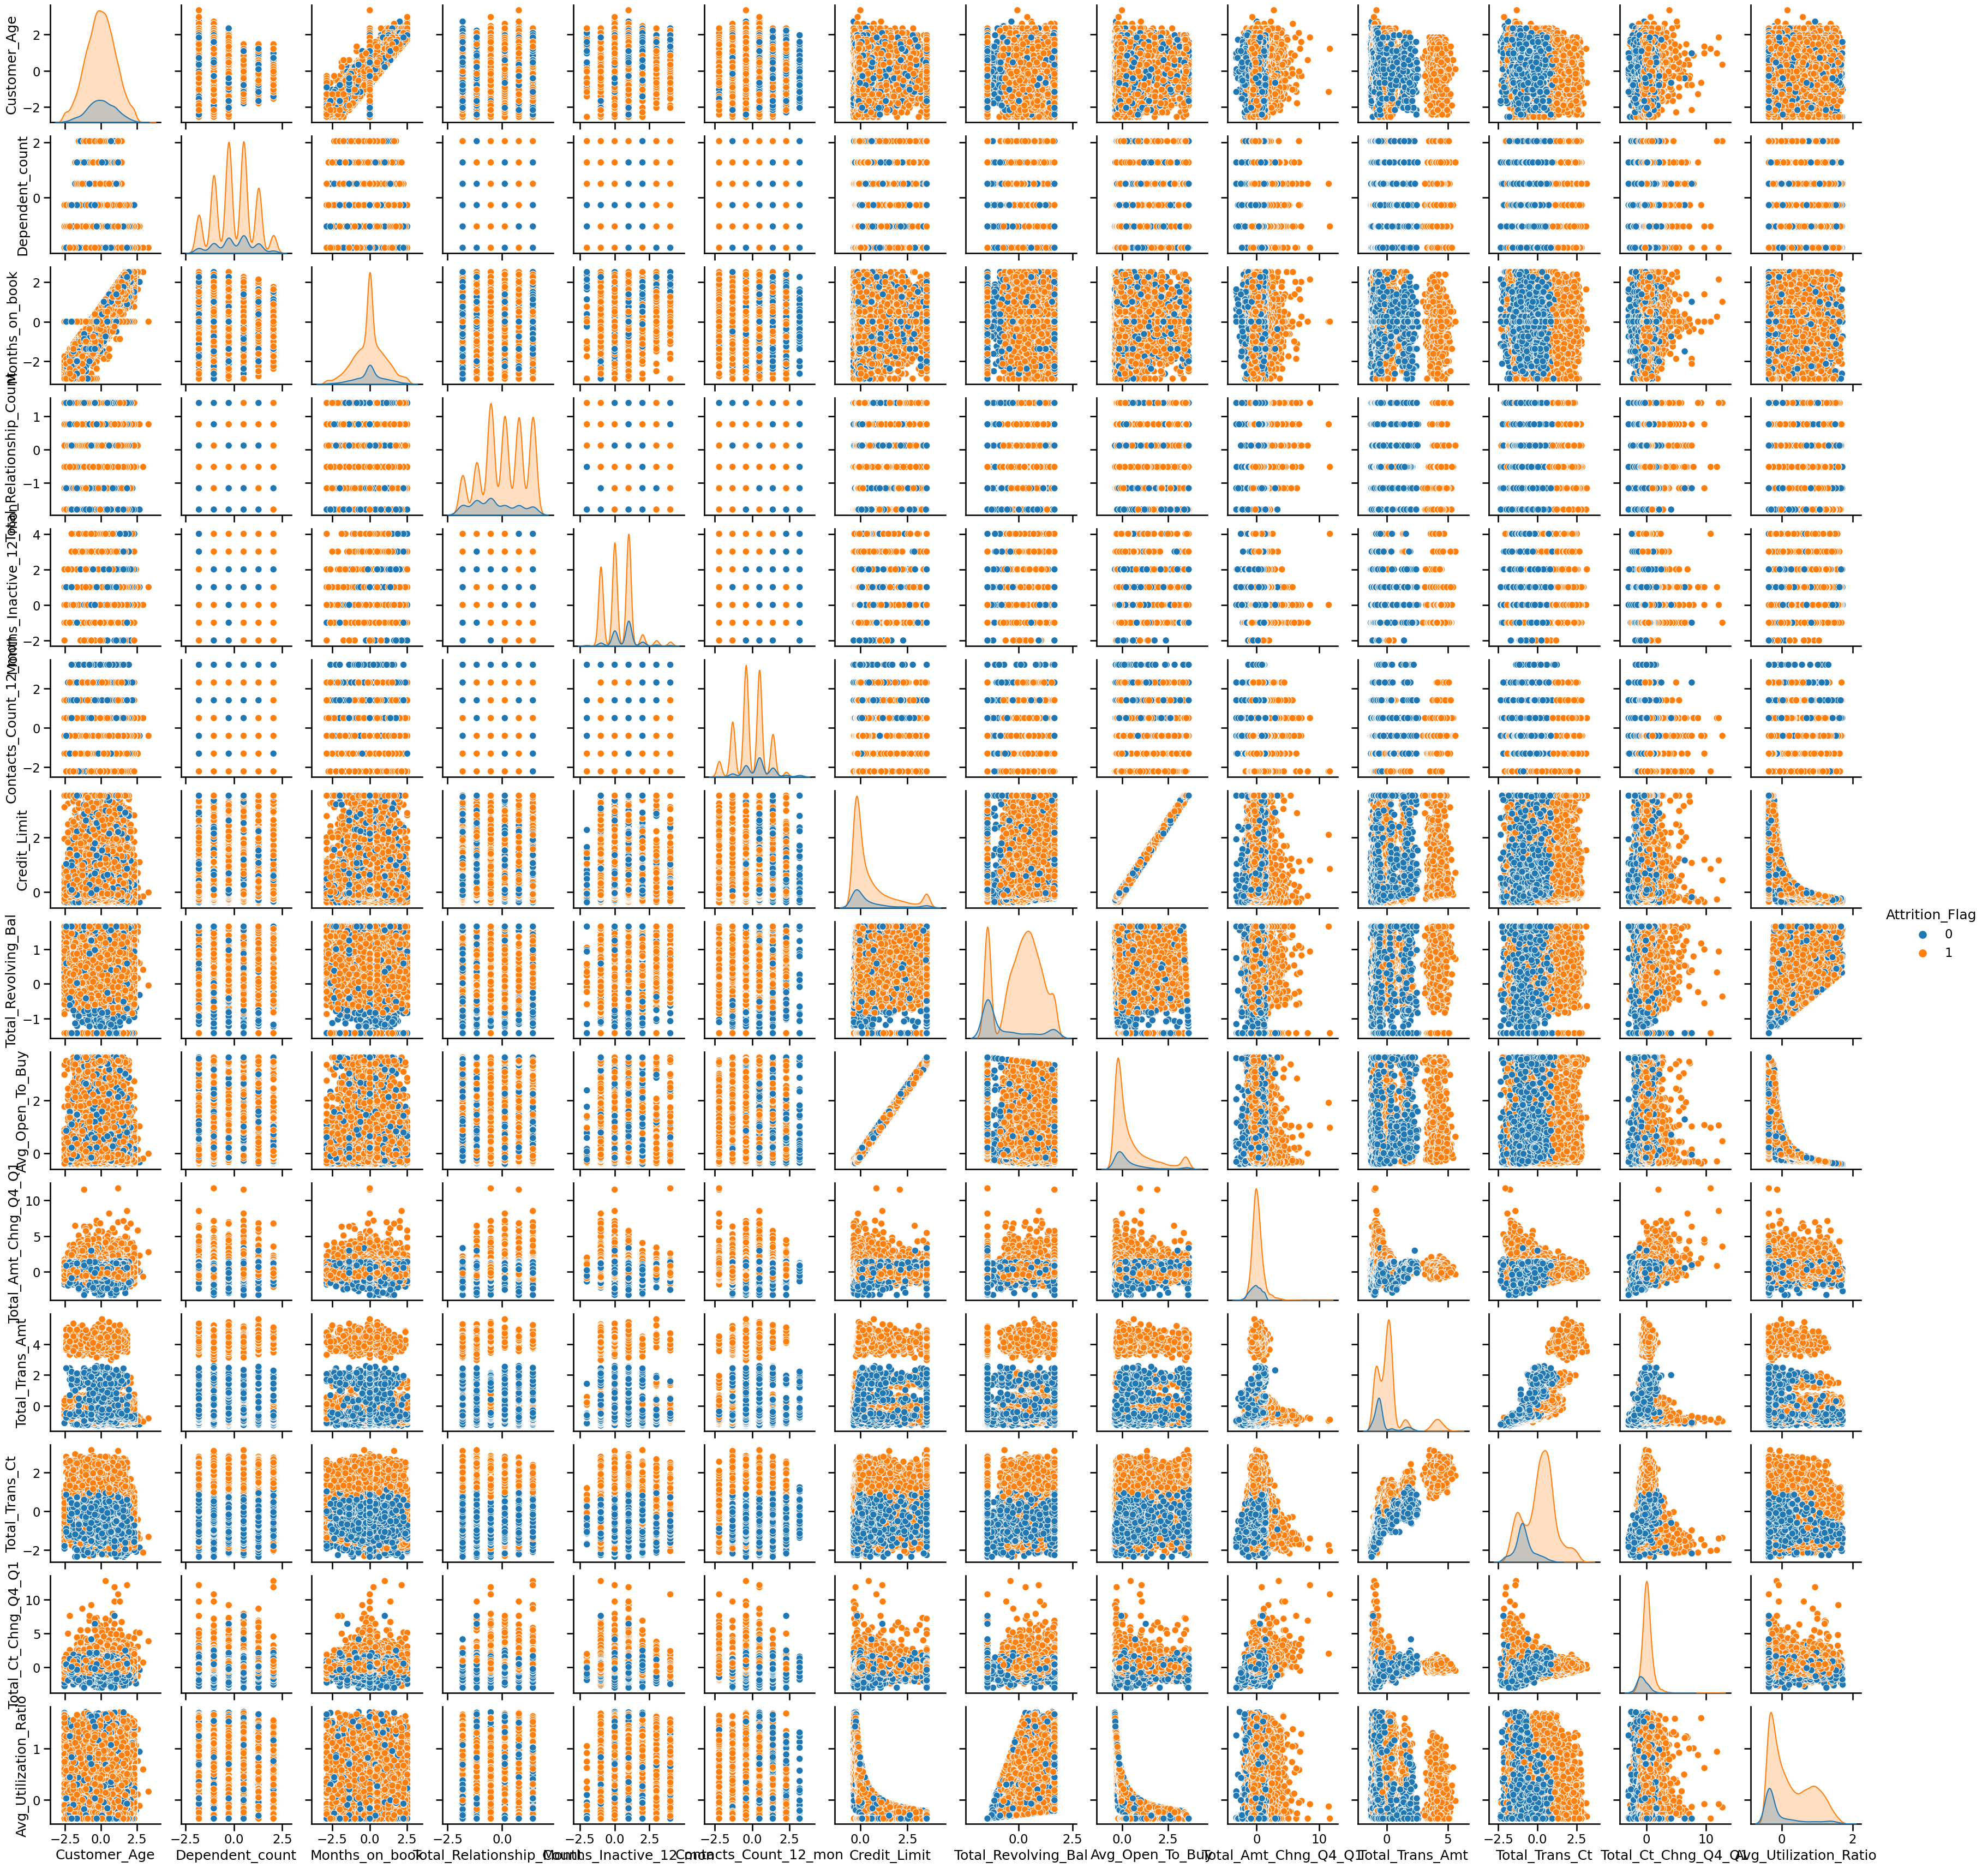

In [39]:
pairplot_df = df[numeric_columns].copy()
pairplot_df['Attrition_Flag'] = df['Attrition_Flag']
sns.set_context('talk')
sns.pairplot(pairplot_df, hue='Attrition_Flag')
plt.show()

Vì bài toán classification là bài toán phân loại dựa trên sự khác biệt (ở đây là khác biệt về phân bố các điểm data với các nhãn). 

Những feature thể hiện sự phân chia rõ ràng nhất ở các điểm data với target = 0/1, sẽ là những target đóng vai trò quan trọng nhất trong bài toán classification.

### Correlation between quantitive features - target using Point-biserial correlation

Để xét rõ hơn về loại này thì ta sẽ sử dụng point-biserial correlation coefficient để tính correlation giữa quantitive variable và a dichotomous variable (category 0/1). Xét về công thức toán học, point-biserial correlation chính là Pearson's correlation khi target chỉ nhận 2 giá trị 0 và 1

"If rpb is positive, it means that as the value of the dichotomous variable increases (from 0 to 1), the value of the quantitive variable also tends to increase. If rpb is negative, it means that as the value of the dichotomous variable increases, the value of the quantitive variable tends to decrease."

<AxesSubplot:>

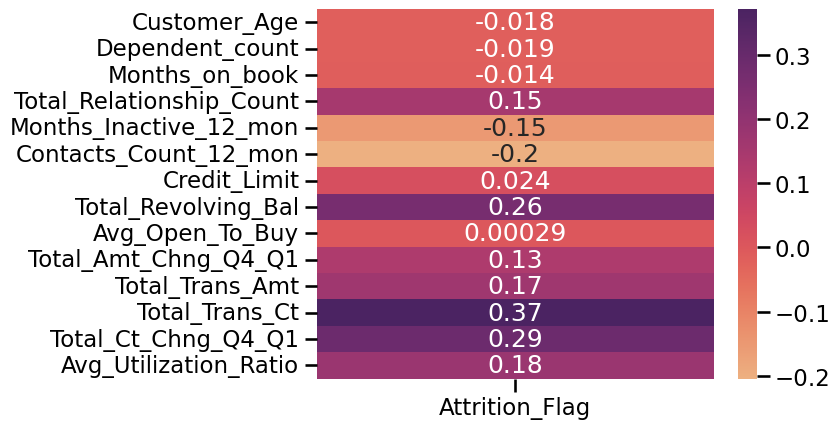

In [40]:
#Correlation quantitive feature - target
from scipy.stats import pointbiserialr

target_column = 'Attrition_Flag'

# Calculate rpb for each feature column
correlations = {}
for feature_column in numeric_columns:
    rpb, _ = pointbiserialr(df[target_column], df[feature_column])
    correlations[feature_column] = rpb

# Create a DataFrame with the correlations
corr_df = pd.DataFrame(correlations, index=[target_column])

# Create a heatmap of the correlations
sns.heatmap(corr_df.transpose(), cmap="flare", annot=True)



### Box-plot

Ta tiếp tục vẽ box plot cho 3 features có correlation với target nhất để nhìn rõ hơn phân bố của chúng (show the distribution of quantitive variables for each category).

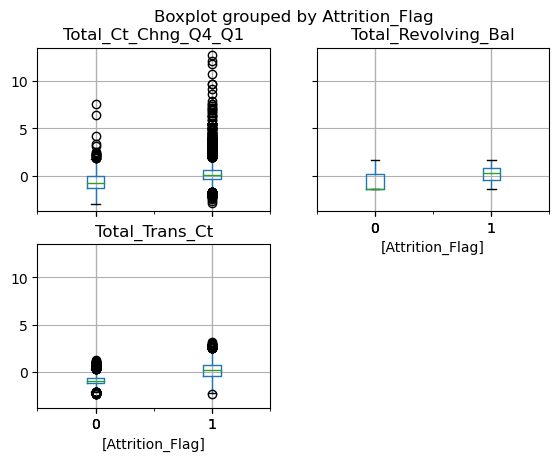

In [41]:
#box plot
plt.rcdefaults()

most_corr_ft = ['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal']
box_df = df[most_corr_ft].copy()
box_df['Attrition_Flag'] = df['Attrition_Flag']

box_df.boxplot(by="Attrition_Flag")
plt.show()

2 cái hộp này càng cách xa nhau càng tốt (sự khác biệt trong phân phối). 

Nhưng ta cũng thấy với cả 3 variable, sự khác biệt này không quá lớn nên corr thấp cũng là phải.

### Correlation between quantitive features (and quantitive features - encoding categorical feature) using Pearson's correlation

Xét thử Pearson's correlation trên toàn bộ các biến.

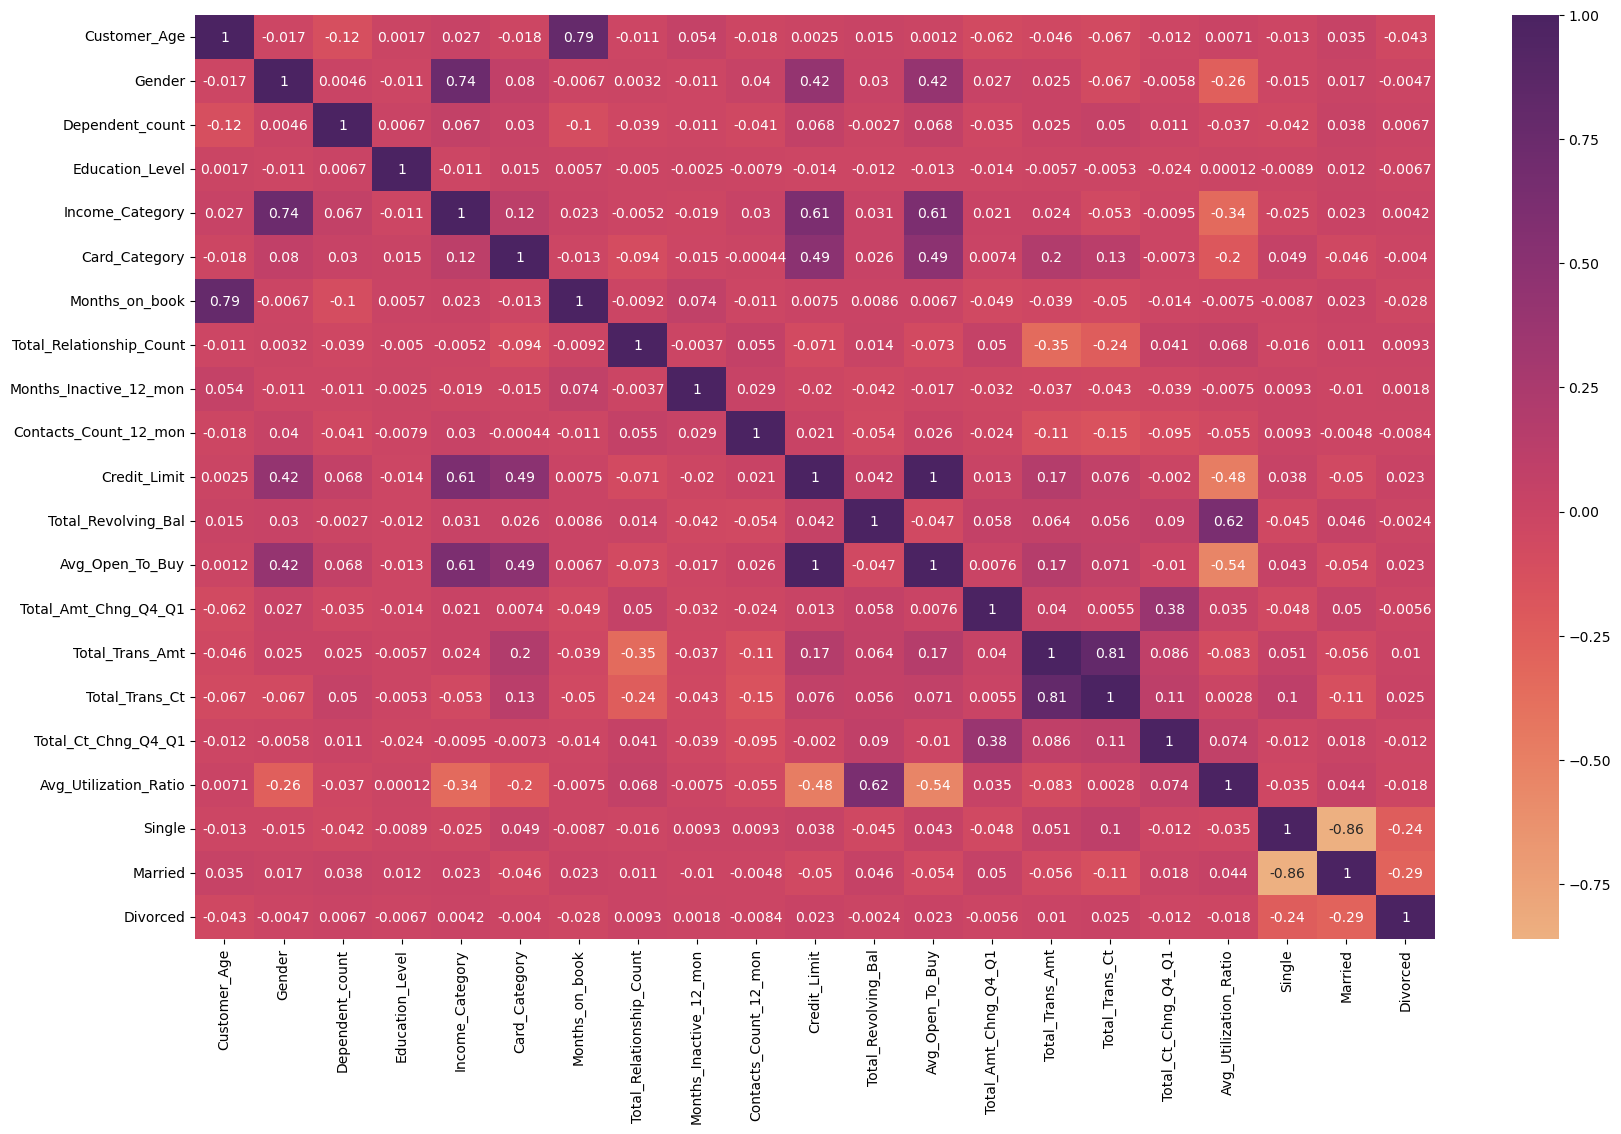

In [42]:
corr_matrix = df.drop('Attrition_Flag', axis=1).corr()
plt.figure(figsize=(20,12))
ax = sns.heatmap(corr_matrix, cmap="flare", annot=True)

plt.show()

=> Ta thấy xuất hiện các giá trị correlation coeffition của cả các categorical features. Khi đó, để xác định độ tương quan thì sẽ không sử dụng Pearson's correlation, vì nó coi tất cả các biến là quantitive variables, nhưng vì ta đã đưa các dữ liệu dạng danh mục về dạng số một cách hợp lý nên giá trị có sự tham gia của categorical variables vẫn chấp nhận được.

Đoạn này làm với ngọc để rút ra nhận xét

Ta nhận thấy 1 số feature có độ tương quan rất lớn, 1 số feature còn có thể suy ra từ các feature khác. Ta sẽ xử lý điều này ở bước Feature Selection trong Modeling

### Categorical variables' correlation using Chi-square test

Ta sẽ sử dụng chi-square test và cramer's V để xét có correlation giữa các categorical variable hay không và mức độ của correlation đó 

H0: There is no relationship between Gender and Income_Category. In other words, the two variables are independent.

H1: There is a relationship between Gender and Income_Category. In other words, the two variables are not independent.

In [43]:
#chi-square test và cramer's v for category variable

from scipy.stats import chi2_contingency

data = pd.crosstab(df['Gender'], df['Income_Category'])
print('Contingency table:')
print(data)

chi2, p, dof, expected = chi2_contingency(data)

n = sum(np.sum(data))
phi2 = chi2 / n
r, k = np.shape(data)
V = np.sqrt(phi2 / min(k - 1, r - 1))

print("P-value:",p)
print("Cramer's V:",V)


Contingency table:
Income_Category     0     1     2     3    4
Gender                                      
0                3653  1437   155   111    2
1                 278   798  1420  1546  727
P-value: 0.0
Cramer's V: 0.7726892095113609


The p value is less than 0.05 (approx. 0), so we are rejecting the null hypothesis at 5% significance level.
And we could also see Cramer's V (strength of the correlation) between 2 variables is approximately 0.77.

So there is strong relation between Gender and Income_Category.

*Note: Chi-square test treats the variables as nominal, so it does not take into account the order of the categories. This means that the test may not be as powerful as other methods that are specifically designed for ordinal data, such as the Goodman-Kruskal gamma or Kendall’s tau-b.


Chi-square test coi mọi giá trị trong category là bình đẳng, expected value của chi-square test cũng là giá trị nên xảy ra nếu 2 danh mục không có quan hệ và cùng bình đẳng

Làm tương tự, ta sẽ xây dựng heatmap dựa trên Cramer's V của các categorical variables

<AxesSubplot:>

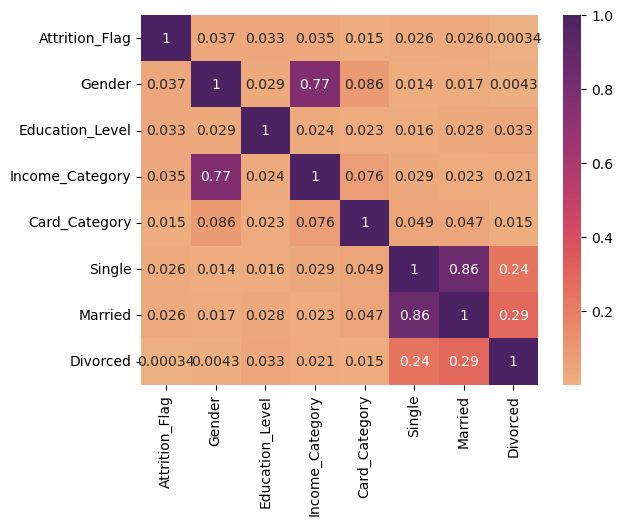

In [44]:
cate_columns = ['Attrition_Flag', 'Gender', 'Education_Level', 'Income_Category', 'Card_Category', 'Single', 'Married', 'Divorced']

n = len(cate_columns)
V_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(i, n):
        data = pd.crosstab(df[cate_columns[i]], df[cate_columns[j]])
        chi2, _, _, _ = chi2_contingency(data)

        num = sum(np.sum(data))
        phi2 = chi2 / num
        r, k = np.shape(data)
        V = np.sqrt(phi2 / min(k - 1, r - 1))

        V_matrix[i, j] = V
        V_matrix[j, i] = V

sns.heatmap(V_matrix, cmap="flare", annot=True, xticklabels=cate_columns, yticklabels=cate_columns)


## Modeling